[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

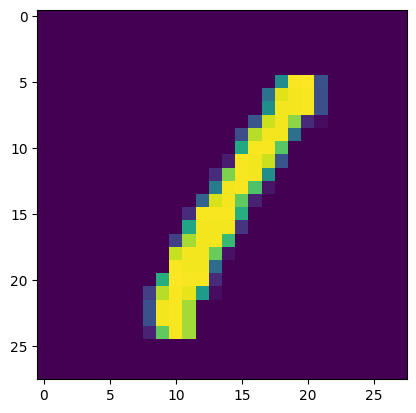

In [4]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers




#Importing the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test
#Normalizing the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(X_train[4])
print(y_train[4])
plt.imshow(X_train[3]) 

print(X_train.shape)
print(X_train.shape[1:])
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


In [5]:

model = tensorflow.keras.models.Sequential()

#Adding the model layers
# The number of units is the number of neurons connected to the 
#layer holding the concatenated vector of hidden state and input
model.add(tensorflow.keras.layers.LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.LSTM(128))
model.add(tensorflow.keras.layers.Dense(64, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.Dense(10, activation='softmax'))

#Compiling the model
model.compile( loss='sparse_categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.legacy.Adam(lr=0.001), metrics=['accuracy'] )

#Fitting data to the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

# Evaluating the test loss and accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']




Epoch 1/3


/opt/homebrew/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1875/1875 [==============================] - 114s 60ms/step - loss: 0.3533 - accuracy: 0.8886 - val_loss: 0.1102 - val_accuracy: 0.9662
Epoch 2/3
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1049 - accuracy: 0.9716 - val_loss: 0.0877 - val_accuracy: 0.9730
Epoch 3/3
313/313 [==============================] - 6s 19ms/step - loss: 0.0580 - accuracy: 0.9826
Test Loss: 0.05801217630505562
Test Accuracy: 0.9825999736785889


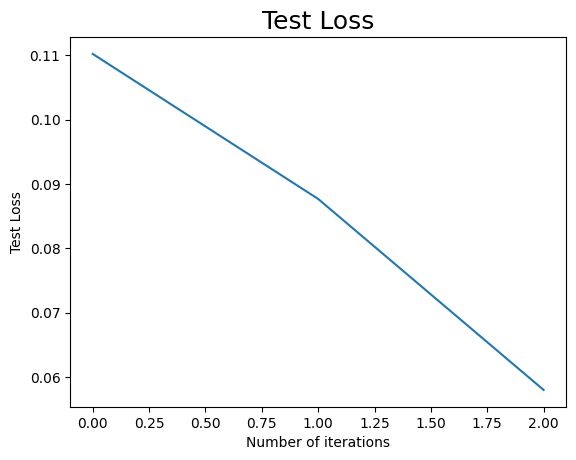

In [6]:
#visualizing the change in the validation loss
plt.plot(val_loss) 
plt.title("Test Loss",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Test Loss") 
plt.show() 


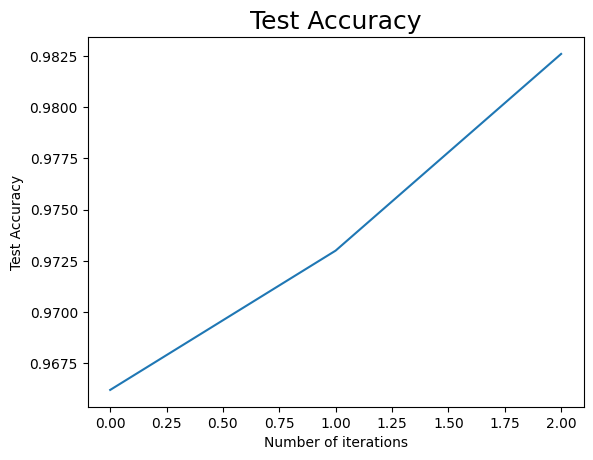

In [7]:
#visualizing the change in the validation loss
plt.plot(val_acc) 
plt.title("Test Accuracy",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Test Accuracy") 
plt.show()